<h1 align="center"> Principlal Component Analysis </h1>
<h3 align="center"> IST 5520, 2021 Fall </h3>
<h3 align="center"> Group 7 </h3>

In [1]:
# Import modules and set inline mode
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
pitchingdat = pd.read_csv(r"no_NA_PitchingDF.csv", index_col = 0)
hittingdat = pd.read_csv(r"no_NA_HittingDF.csv", index_col = 0)

<h1 align="center"> Normailze data before doing PCA </h1>

In [3]:
pitchingnorm = scale(pitchingdat.loc[:,'yearID':'LogSalary'])
hittingnorm = scale(hittingdat.loc[:,'yearID':'LogSalary'])

pitching_corr = pd.DataFrame(pitchingnorm).describe().transpose()
pitching_corr

,count,mean,std,min,25%,50%,75%,max
0,5503.0,9.668443e-15,1.000091,-1.640313,-0.896297,0.095723,0.839738,1.583753
1,5503.0,5.681243e-17,1.000091,-1.024212,-0.817484,-0.404027,0.629614,3.937267
2,5503.0,1.032953e-17,1.000091,-1.179253,-0.932159,-0.190877,0.797499,4.009722
3,5503.0,3.357098e-17,1.000091,-1.612367,-0.729029,-0.171131,0.805191,2.711343
4,5503.0,-2.582383e-18,1.000091,-0.764392,-0.764392,-0.764392,0.941984,2.027859
5,5503.0,3.873575e-17,1.000091,-0.357607,-0.357607,-0.357607,-0.357607,11.803639
6,5503.0,-2.840622e-17,1.000091,-0.293937,-0.293937,-0.293937,-0.293937,12.982693
7,5503.0,2.195026e-17,1.000091,-0.335457,-0.335457,-0.335457,-0.219348,6.863307
8,5503.0,4.906528e-17,1.000091,-1.289866,-0.754379,-0.314875,0.720738,2.736393
9,5503.0,-1.032953e-17,1.000091,-1.277552,-0.747497,-0.384030,0.782093,2.781160


In [4]:
hitting_corr = pd.DataFrame(hittingnorm).describe().transpose()
hitting_corr

,count,mean,std,min,25%,50%,75%,max
0,5373.0,1.337243e-14,1.000093,-1.571616,-0.831754,-0.091892,0.894591,1.634453
1,5373.0,-2.909350e-17,1.000093,-2.198215,-0.780558,0.171930,0.902910,1.390229
2,5373.0,1.110843e-16,1.000093,-1.468272,-0.885174,-0.107710,0.766937,3.164118
3,5373.0,-7.934592e-17,1.000093,-1.391244,-0.848488,-0.146098,0.683999,3.589340
4,5373.0,-5.554215e-17,1.000093,-0.643605,-0.643605,-0.424316,0.123909,7.908701
5,5373.0,-2.644864e-18,1.000093,-0.786928,-0.786928,-0.436566,0.264157,7.621751
6,5373.0,8.463565e-17,1.000093,-1.616305,-0.817169,-0.117926,0.706183,3.952672
7,5373.0,0.000000e+00,1.000093,-0.612681,-0.612681,-0.376633,0.095465,27.713184
8,5373.0,3.173837e-17,1.000093,-0.635943,-0.635943,-0.264256,0.107432,8.284550
9,5373.0,-3.438323e-17,1.000093,-1.133355,-0.720086,-0.306817,0.519720,5.065676


<h1 align="center"> Principal Component Analysis for Pitching </h1>

In [5]:
# Selecting Number of Components and fitting the PCA model for Pitching

pitchingPCA = PCA(n_components = 27)
pitchingPCA.fit(pitchingnorm)

PCA(n_components=27)

In [6]:
#The amount of variance that each PC explains

pitchingvar = pitchingPCA.explained_variance_ratio_

print(pitchingvar)

[4.91874483e-01 1.06735723e-01 5.96048959e-02 4.75405965e-02
 4.32897675e-02 3.37437230e-02 3.10957871e-02 2.96256531e-02
 2.29764692e-02 1.88619647e-02 1.83385435e-02 1.63586333e-02
 1.48819077e-02 1.39418396e-02 1.21457219e-02 9.49995117e-03
 8.54474332e-03 6.30689154e-03 5.16070851e-03 3.46344645e-03
 2.73594343e-03 1.54674748e-03 1.06681692e-03 3.62252011e-04
 1.81630137e-04 1.12680135e-04 2.48035381e-06]


In [7]:
#Cumulative Variance Explains for Pitching

pitchingvar1 = np.cumsum(np.round(pitchingPCA.explained_variance_ratio_, decimals = 4)*100)

print(pitchingvar1)

[49.19 59.86 65.82 70.57 74.9  78.27 81.38 84.34 86.64 88.53 90.36 92.
 93.49 94.88 96.09 97.04 97.89 98.52 99.04 99.39 99.66 99.81 99.92 99.96
 99.98 99.99 99.99]


Drawing a Scree Plot for both Pitching and Hitting to show the cumulative variance explained along the number of principal components

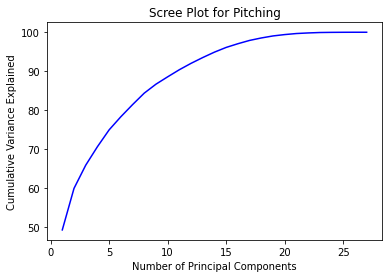

In [8]:
pitchingvar1 = pd.DataFrame(pitchingvar1, index=np.arange(1,28))
plt.plot(pitchingvar1,color='blue')
plt.title('Scree Plot for Pitching')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see if we choose a 11-component solution, the explained variance would be > 90%. 

In [9]:
pitchingPCA11 = PCA(n_components = 11)
pitchingPCA11.fit(pitchingnorm)
data_pitchingPCA11 = pitchingPCA11.transform(pitchingnorm)

pd.DataFrame(pitchingPCA11.components_.transpose(),
            index = pitchingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,12)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yearID,-0.025583,-0.013020,-0.336952,-0.233649,-0.497149,0.251681,0.429230,0.479276,-0.248042,-0.038278,0.067678
W,0.243157,-0.043516,-0.125251,0.016130,0.019409,-0.002033,0.037910,-0.032581,-0.013354,-0.066239,0.027006
L,0.240815,-0.005135,0.106021,0.013764,-0.125143,-0.032996,-0.025765,0.028892,-0.113980,-0.025932,-0.064342
G,0.004591,-0.474743,0.170559,-0.020964,0.120866,0.044103,0.226259,0.130222,-0.007718,0.314894,0.179779
GS,0.260310,0.115893,-0.063932,-0.012797,-0.093931,-0.026464,-0.063999,-0.049948,-0.060347,-0.137552,-0.072205
CG,0.160666,0.048277,-0.371138,0.355248,0.318175,0.053660,0.125033,0.011720,-0.002709,0.095109,0.021123
SHO,0.131554,0.041371,-0.400501,0.371722,0.366621,0.088891,0.208027,0.053607,-0.009983,0.077925,-0.002486
SV,-0.049450,-0.432696,0.057813,0.397553,-0.245006,0.107003,-0.063468,-0.186765,-0.172839,-0.215659,-0.108688
IPouts,0.269531,-0.046035,-0.039626,0.006884,-0.018766,-0.006039,0.021396,-0.017705,-0.061248,-0.038351,-0.014400
H,0.268762,0.012968,0.038787,0.024017,-0.041914,-0.037520,-0.008044,0.002396,-0.104569,0.008680,-0.027277


<h1 align="center"> Principal Component Analysis for Hitting </h1>

In [10]:
# Selecting Number of Components and fitting the PCA model for Hitting

hittingPCA = PCA(n_components = 17)
hittingPCA.fit(hittingnorm)

PCA(n_components=17)

In [11]:
#The amount of variance that each PC explains

hittingvar = hittingPCA.explained_variance_ratio_

print(hittingvar)

[4.84631380e-01 1.25427779e-01 9.64933833e-02 6.13064128e-02
 4.70088379e-02 4.35962769e-02 3.62445543e-02 2.76148550e-02
 2.57444829e-02 1.37974622e-02 1.26826169e-02 8.55576270e-03
 7.16534048e-03 4.94380383e-03 2.99292452e-03 1.79412747e-03
 3.69683534e-19]


In [12]:
#Cumulative Variance Explains for Hitting

hittingvar1 = np.cumsum(np.round(hittingPCA.explained_variance_ratio_, decimals = 4)*100)

print(hittingvar1)

[48.46 61.   70.65 76.78 81.48 85.84 89.46 92.22 94.79 96.17 97.44 98.3
 99.02 99.51 99.81 99.99 99.99]


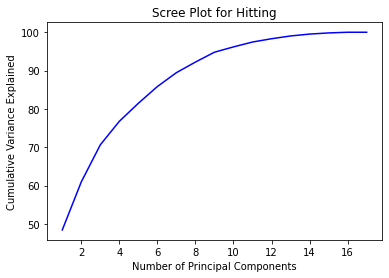

In [13]:
hittingvar1 = pd.DataFrame(hittingvar1, index=np.arange(1,18))
plt.plot(hittingvar1,color='blue')
plt.title('Scree Plot for Hitting')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained');

From the above plot, we can see that if we choose a 8-component solution, the explained variance would be > 90%.

In [14]:
hittingPCA8 = PCA(n_components = 8)
hittingPCA8.fit(hittingnorm)
data_hittingPCA8 = hittingPCA8.transform(hittingnorm)

pd.DataFrame(hittingPCA8.components_.transpose(),
            index = hittingdat.loc[:,'yearID':'LogSalary'].columns,
            columns = ['PC' + str(i) for i in range(1,9)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
yearID,-0.017810,0.036497,-0.253805,0.867017,-0.108011,-0.190238,0.296642,0.148002
G,0.307946,0.160843,-0.140689,-0.063136,-0.148560,-0.101990,0.060193,-0.125382
R,0.323707,0.141478,-0.094940,-0.039941,-0.007689,0.077188,-0.051962,-0.088893
RBI,0.321305,-0.048061,-0.206368,-0.094181,-0.085929,0.051542,-0.050503,-0.030654
SB,0.139469,0.509306,0.152532,0.139915,0.230789,0.269834,-0.149177,0.176236
CS,0.149334,0.511538,0.147658,0.115449,0.171740,0.215392,-0.128059,0.095387
SO,0.269252,0.110838,-0.233024,0.139514,-0.281333,0.144672,-0.060773,-0.372852
IBB,0.191876,-0.184060,-0.123805,-0.137318,0.295664,0.469087,0.737067,0.116036
SH,0.019694,0.464547,0.210719,-0.216993,0.004085,-0.514133,0.500432,-0.190056
SF,0.240224,0.007011,-0.238656,-0.186013,-0.068233,-0.218217,-0.094054,0.798986
